# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [132]:
import pandas as pd
df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [134]:
def num_nans(df):
    return df.isnull().any(axis=1).sum()

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [135]:
def drop_na(df):
    drop_these = df.isnull().sum()
    drop_these = drop_these[drop_these>200].index
    df = df.drop(columns=drop_these)
    return df

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [136]:
def to_numerical(df):
    df['Sex'] = [0 if i=='male' else 1 for i in df['Sex'] ]
    return df['Sex']
df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [137]:
import re
def extract_names(df):
    ans = pd.DataFrame()
    splits = df['Name'].str.split(', ')
    clean_splits = []
    for input_string in splits:
        result = re.sub(r'\'(.*?)\'|\"(.*?)\"', '', input_string[1])
        clean_splits.append(result)

    ans['First Name'] = [it[1].split('. ')[1].split(' ')[0] for it in splits]

    middle_names = []
    for it in splits:
        first_middle = it[1].split('. ')[1].split(' ')
        if len(first_middle)>1:
            middle_names.append(first_middle[1])
        else:
            middle_names.append(None)
    ans['Middle Name'] = middle_names
    ans['Last Name'] = [name[0] for name in splits]
    ans['Title'] = [it.split('. ')[0] for it in clean_splits]
    return ans


df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [138]:
def replace_with_mean(df):
    ans = df['Age'].fillna(df['Age'].mean())
    return ans

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


In [139]:
df['Age'].isnull().sum()

0

`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

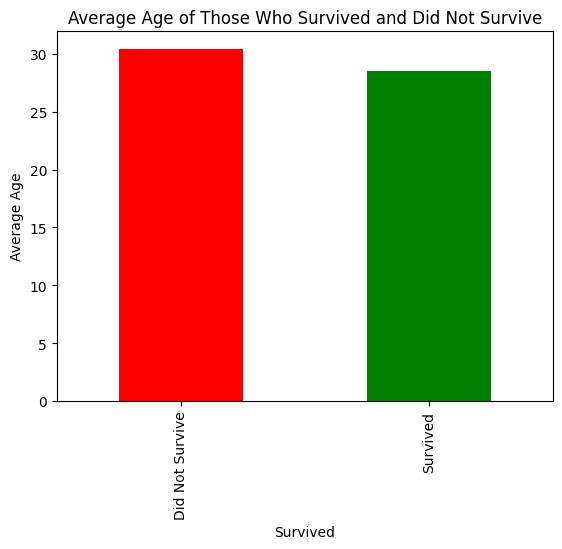

In [140]:
import matplotlib.pyplot as plt
average_age_by_survival = df.groupby('Survived')['Age'].mean()
average_age_by_survival.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Survived')
plt.ylabel('Average Age')
plt.title('Average Age of Those Who Survived and Did Not Survive')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])  
plt.show()

The average age of people that did not survive was relatively higher than of those that survived. It's probably because the children and women were rescued first.

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

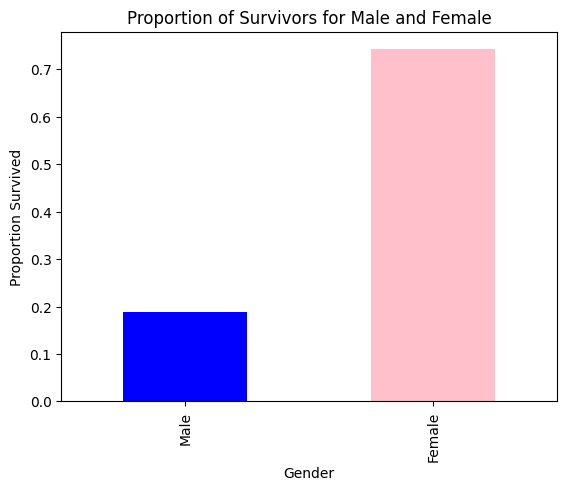

In [141]:
survival_proportion_by_gender = df.groupby('Sex')['Survived'].mean()

survival_proportion_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Proportion Survived')
plt.xticks([0, 1], ['Male', 'Female']) 
plt.title('Proportion of Survivors for Male and Female')
plt.show()

A higher proportion of females actually survived. In my opinion, I think it is because they were possibly rescued first, and men probably risked their lives helping others.

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

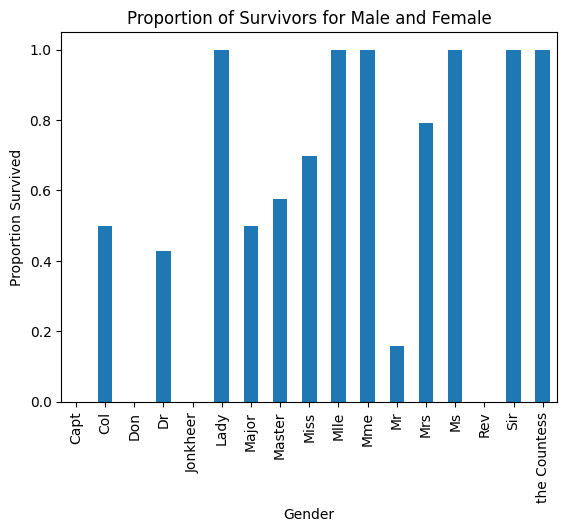

In [142]:
survival_proportion_by_gender = df.groupby('Title')['Survived'].mean()
survival_proportion_by_gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Proportion Survived')
plt.title('Proportion of Survivors for Male and Female')
plt.show()

People with Title 'Mr' survived the least, it's probably becasue they risked their lives to help people with other Titles. The Captain did not survive too. All people with Title 'Sir', 'the Countess' survived, probably because they were given more importance during the rescue opertation.

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

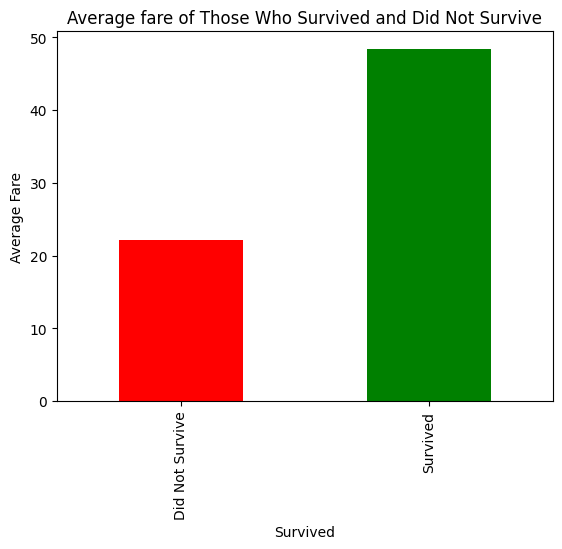

In [143]:
average_age_by_survival = df.groupby('Survived')['Fare'].mean()
average_age_by_survival.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Survived')
plt.ylabel('Average Fare')
plt.title('Average fare of Those Who Survived and Did Not Survive')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])  
plt.show()

Average fare of people who survived is higher. I mean it's kind of obvious because you usually pay more for things like safety and comfort.

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

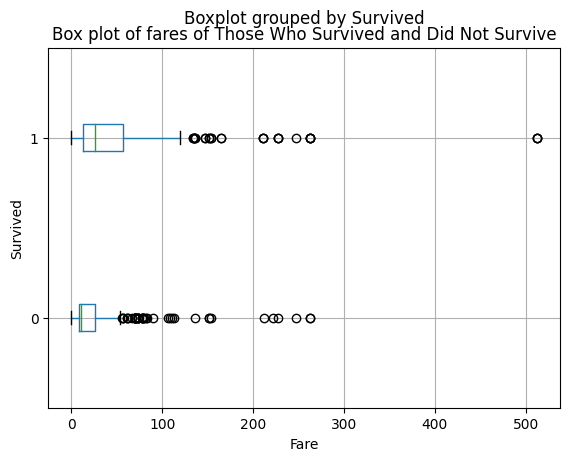

In [144]:
df.boxplot(column='Fare', by='Survived',vert=False)
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Box plot of fares of Those Who Survived and Did Not Survive')
plt.show()

The median of the fares of people who survived is higher than of the ones that did not survive. And we could also see that even some people who paid a higher fair could not survive.

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [145]:
mean = df['Fare'].mean()
std = df['Fare'].std()
df['Fare'] = df['Fare'].apply(lambda x : (x-mean)/std)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [146]:
df = df.select_dtypes(include='number')
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,-0.502163
1,2,1,1,1,38.0,1,0,0.786404
2,3,1,3,1,26.0,0,0,-0.488580
3,4,1,1,1,35.0,1,0,0.420494
4,5,0,3,0,35.0,0,0,-0.486064


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [147]:
from itertools import combinations
from sklearn.metrics.pairwise import euclidean_distances

def N_most_similar_pairs(df, N):
    distances = euclidean_distances(df)
    distances[distances == 0] = float('inf')
    most_similar_pairs = []
    for i, j in combinations(range(len(df)), 2):
        distance = distances[i, j]
        most_similar_pairs.append(("Passenger "+str(i), "Passenger "+str(j), "Distance "+ str(distance)))

    most_similar_pairs.sort(key=lambda x: x[2])
    result = most_similar_pairs[:N]
    return result

print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df.drop(columns='PassengerId'), 3)))

The 3 most similar pairs of passengers are: [('Passenger 103', 'Passenger 285', 'Distance 0.00016702374378357415'), ('Passenger 388', 'Passenger 778', 'Distance 0.00016702408411459335'), ('Passenger 468', 'Passenger 629', 'Distance 0.00016702408411459335')]


Even the non-identical passengers have zero-distances, but still I omitted them as instructed in the question.

## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

c:\Users\91960\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


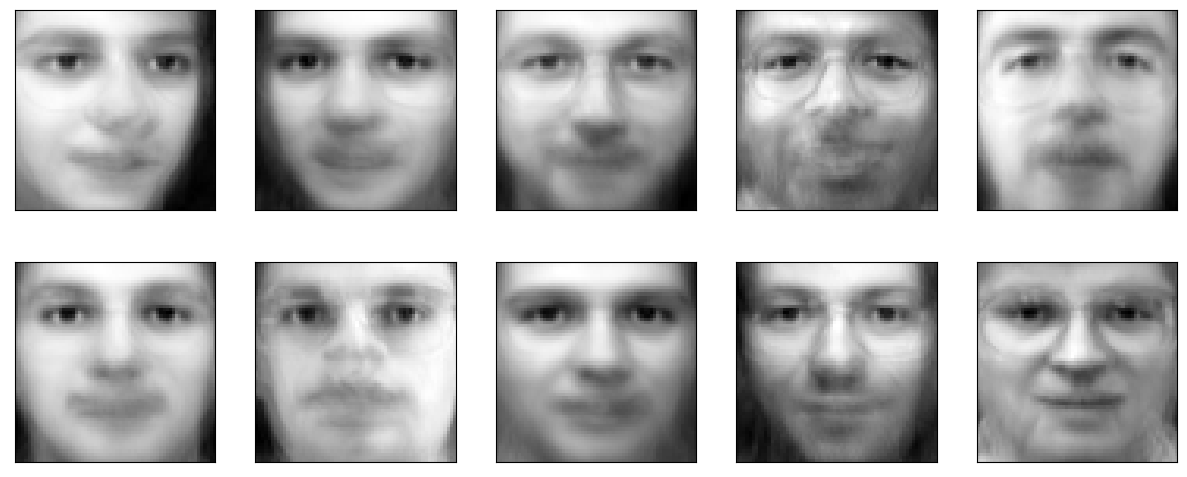

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(faces_data)

fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

centroids = kmeans.cluster_centers_.reshape(10, 64, 64)

for ax, centroid in zip(axes.flat, centroids):
    ax.imshow(centroid, cmap='gray')

plt.show()



#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [172]:
from sklearn.metrics import silhouette_score

labels = faces.target  # Labels attached to each image

silhouette_kmeans = silhouette_score(faces_data, clusters)
silhouette_labels = silhouette_score(faces_data, labels)

print(f"Silhouette Score for K-means clustering: {silhouette_kmeans:.4f}")
print(f"Silhouette Score for Label-based clustering: {silhouette_labels:.4f}")


Silhouette Score for K-means clustering: 0.0811
Silhouette Score for Label-based clustering: 0.1056


A higher silhouette score for label-based clustering suggests that the natural groupings based on person identity are more distinguishable.
However, it's important to note that the label-based clustering is based on ground truth information, whereas K-means clustering is unsupervised and may not align with the true underlying structure of the data. The comparison of silhouette scores provides insights into the quality of the clustering, but the interpretation should consider the nature of the dataset and the characteristics of the clusters.

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

124


C:\Users\91960\AppData\Local\Temp\ipykernel_17328\932861762.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 400 + 1) instead
  random_image_id = np.random.random_integers(0,len(faces.images))


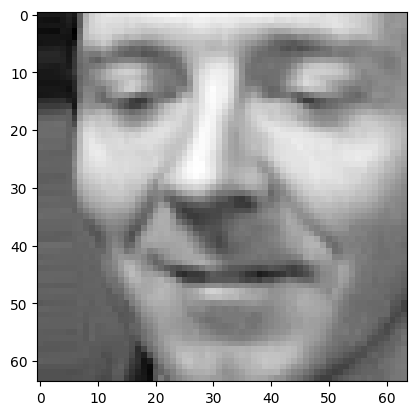

In [173]:
import numpy as np
random_image_id = np.random.random_integers(0,len(faces.images))
print(random_image_id)
plt.imshow(faces.images[random_image_id],cmap='gray')

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

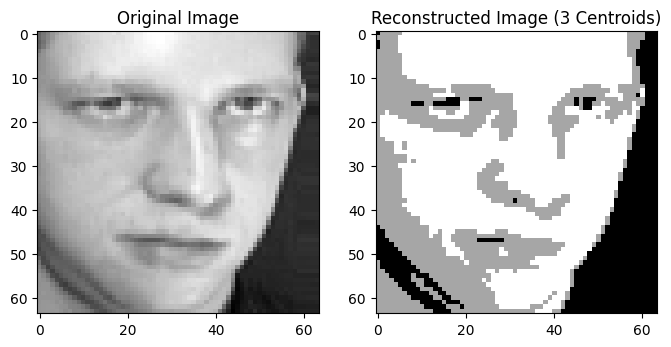

In [174]:
from IPython.display import Image
Image(filename="Example.png", width=600, height=600)

c:\Users\91960\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


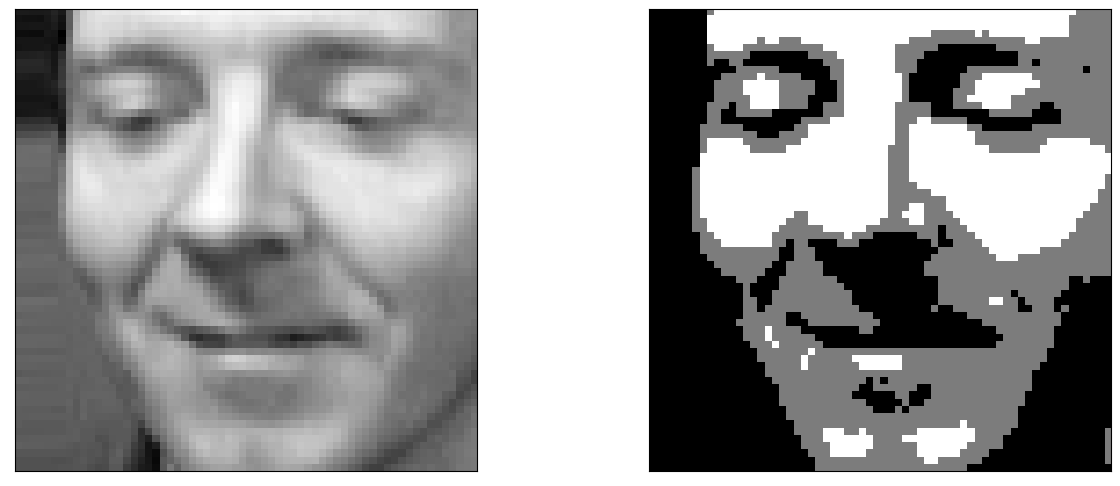

In [175]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_assignments = kmeans.fit_predict(faces.data[random_image_id].reshape(4096,1))
centroids = kmeans.cluster_centers_
X_replaced = centroids[cluster_assignments]

fig, axes = plt.subplots(1,2, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
images = [faces.data[random_image_id].reshape(64,64), X_replaced.reshape(64,64)]
for ax, im in zip(axes.flat, images):
    ax.imshow(im, cmap='gray')


#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

c:\Users\91960\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\91960\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


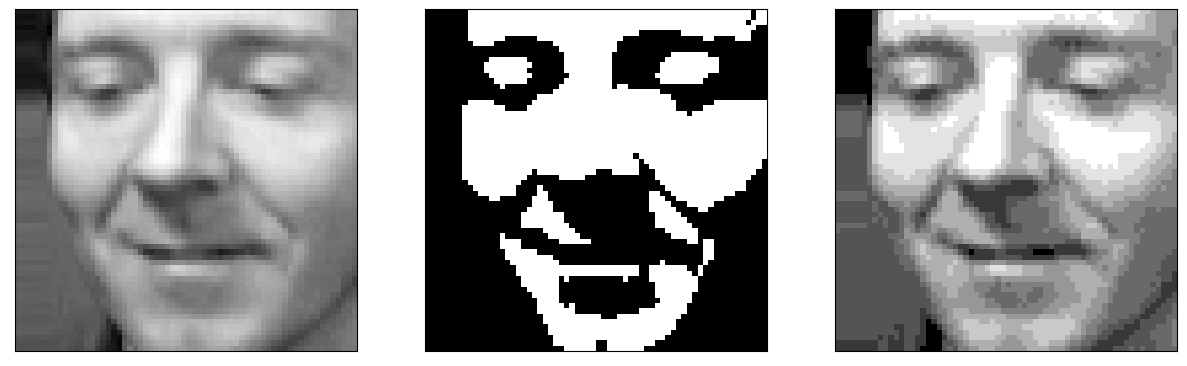

In [176]:
def kcolors(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_assignments = kmeans.fit_predict(faces.data[random_image_id].reshape(4096,1))
    centroids = kmeans.cluster_centers_
    X_replaced = centroids[cluster_assignments]
    return (X_replaced).reshape(64,64)


fig, axes = plt.subplots(1,3, figsize=(15, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
images = [faces.data[random_image_id].reshape(64,64),kcolors(2),kcolors(10)]
for ax, im in zip(axes.flat, images):
    ax.imshow(im, cmap='gray')

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

In [177]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers_3d = [[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]
centers_3d = np.array(centers_3d)
X_3d, _ = datasets.make_blobs(n_samples=300, centers=centers_3d, cluster_std=1.5, random_state=1)

class KMeans():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []
    
    def snap(self, centers):
        TEMPFILE = "temp_3d.png"

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],c=self.assignment)
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='r', marker='x', s=100)

        ax.view_init(elev=25, azim=-30) 
        ax.set_xlim([-8, 8])
        ax.set_ylim([-8, 8])
        ax.set_zlim([-8, 8])
        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))


    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)),self.k, replace = False)]
    
    def distance(self,x,y):
        return  np.linalg.norm(x-y)
    
                         
    def assign(self, centers):
        for i in range(len(self.data)):
            delta = [float('inf'),0]
            for j in range(len(centers)):
                distance = self.distance(centers[j],self.data[i])
                if distance<delta[0]:
                    delta[0] = distance 
                    delta[1] = j 
            
            self.assignment[i] = delta[1]


    def get_centers(self):
        centers = []

        for i in set(self.assignment):
            cluster = []

            for j in range(len(self.data)):
                if self.assignment[j] == i:
                    cluster.append(self.data[j])
            x, y, z = 0, 0, 0
            for delta in range(len(cluster)):
                x += cluster[delta][0]
                y += cluster[delta][1]
                z += cluster[delta][2]
            centers.append([x / len(cluster), y / len(cluster), z / len(cluster)])

        return np.array(centers)


            
    def is_diff_centers(self,centers, new_centers):
        n = len(centers)
        flag = 0
        for i in range(n):
            if centers[i][0]!=new_centers[i][0]:
                flag = 1
        
        if flag ==1:
            return True 
        return False



    def lloyds(self):
        # ...
        # print(15)
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers)
        new_centers = self.get_centers()

        while self.is_diff_centers(centers,new_centers):
            # print(10)
            
            self.assign(new_centers)
            centers = new_centers
            self.snap(centers)
            new_centers = self.get_centers()

        
        return 

kmeans_3d = KMeans(X_3d, 4)
kmeans_3d.lloyds()
images_3d = kmeans_3d.snaps

images_3d[0].save(
    'kmeans_3d.gif',
    optimize=False,
    save_all=True,
    append_images=images_3d[1:],
    loop=0,
    duration=500
)



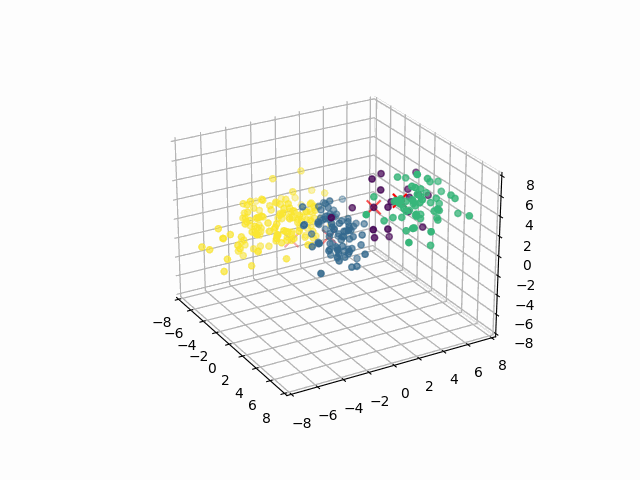

In [178]:
from IPython.display import display, Image
gif_path = 'kmeans_3d.gif'
display(Image(filename=gif_path))
